In [317]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt

In [318]:
df = pd.read_csv('dataset.csv')
df.head()

,Unnamed: 0,id,total_sold,avg_sold_price,max_sold_price,types,rarity,skin,traits,total_traits,marcador
0,0,0,3.0,9.193333,25.00,Female,2023,Mid,"Blonde Bob,Earring,Green Eye Shadow",3,1
1,1,1,3.0,30.473333,60.00,Male,4352,Dark,"Mohawk,Smile",2,1
2,14,14,3.0,1.750000,2.50,Female,155,Dark,"Hot Lipstick,Pilot Helmet,Pipe",3,1
3,33,33,1.0,0.510000,0.51,Male,7635,Light,Peak Spike,1,1
4,53,53,2.0,21.000000,22.00,Female,2825,Light,"Big Shades,Straight Hair",2,1


In [319]:
df.shape

(5615, 11)

In [320]:
df.drop(['Unnamed: 0','max_sold_price','traits'],axis=1,inplace=True)
df['types'] = df.types.map({'Male':1,'Female':1,'Ape':0,'Zombie':0,'Alien':0})
df['skin'] = df.skin.map({'Mid':4,'Dark':3,'Light':2,'Albino':1,'Ape':0,'Zombie':0,'Alien':0})
df.total_sold = df['total_sold'].astype(int)
#df.drop('id',axis=1,inplace=True)
df.head()

,id,total_sold,avg_sold_price,types,rarity,skin,total_traits,marcador
0,0,3,9.193333,1,2023,4,3,1
1,1,3,30.473333,1,4352,3,2,1
2,14,3,1.750000,1,155,3,3,1
3,33,1,0.510000,1,7635,2,1,1
4,53,2,21.000000,1,2825,2,2,1


In [380]:
df1=pd.read_csv('df_to_model.csv')
df1.drop('Unnamed: 0',axis=1,inplace=True)
df1.dropna(inplace=True)
df1

,human,rarity,traits_range,hidden_traits_range,amount_ethereum,Eth_to_$
0,1,-1.101820,-0.155661,-0.021784,0.036753,-1.354100
1,1,-0.287452,-0.155661,-0.021784,0.439804,-0.858939
2,1,-1.754993,-0.155661,-0.021784,-0.222351,-1.326415
3,1,0.860496,6.424226,-0.021784,-0.245267,-1.260539
4,1,-0.821389,-0.155661,-0.021784,0.002206,0.489623
...,...,...,...,...,...,...
5617,1,0.334251,-0.155661,-0.021784,-0.068616,0.526715
5618,1,-0.939226,-0.155661,-0.021784,-0.135983,-0.351391
5619,1,-1.061259,-0.155661,-0.021784,-0.233867,-1.322793
5620,1,0.835670,-0.155661,-0.021784,-0.179743,-0.211121


In [382]:
df1.isnull().sum()

human                  0
rarity                 0
traits_range           0
hidden_traits_range    0
amount_ethereum        0
Eth_to_$               0
dtype: int64

In [383]:
X = df1.drop(['amount_ethereum','Eth_to_$'],axis=1)
y = df1['amount_ethereum']

#X = df.drop(['id','avg_sold_price','marcador'],axis=1)
#y = df['avg_sold_price']


In [384]:
X.isnull().sum()

human                  0
rarity                 0
traits_range           0
hidden_traits_range    0
dtype: int64

In [386]:
#X.types.unique()
X.human.unique()

array([1, 0])

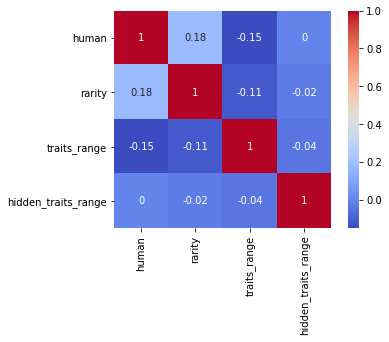

In [387]:
correlation_matrix = X.corr().round(2)
sns.heatmap(data=correlation_matrix, square=True,cmap='coolwarm',annot=True)
plt.show()
#cmap='RdYlGn'

In [388]:
from sklearn.model_selection import train_test_split

In [389]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [390]:
lin_reg = LinearRegression()
ridge = Ridge(alpha=0.5, normalize=True)
lasso = Lasso(alpha=0.5,normalize=True)

In [391]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [392]:
X_test

,human,rarity,traits_range,hidden_traits_range
2558,1,0.183196,-0.155661,-0.021784
4032,1,-0.966150,-0.155661,-0.021784
3673,1,1.316458,-0.155661,-0.021784
571,1,-0.661942,-0.155661,-0.021784
4027,1,-1.146577,-0.155661,-0.021784
...,...,...,...,...
953,1,-0.810550,-0.155661,-0.021784
2257,1,0.075150,-0.155661,-0.021784
730,1,0.738113,-0.155661,-0.021784
3944,1,0.565030,-0.155661,-0.021784


In [393]:
reg.fit(X_train,y_train)
ridge.fit(X_train,y_train)
lasso.fit(X_train,y_train)


Lasso(alpha=0.5, normalize=True)

In [394]:
reg.score(X_test,y_test),ridge.score(X_test, y_test)

(0.1047946748168086, 0.08465344018874277)

In [395]:
y_pred = reg.predict(X_test)
y_pred_ridge = ridge.predict(X_test)

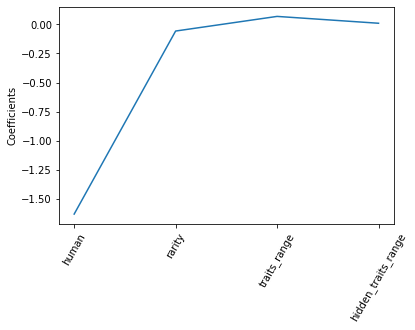

In [396]:
names = X.columns
ridge_coef = ridge.coef_
plt.plot(range(len(names)), ridge_coef)
plt.xticks(range(len(names)), names, rotation=60)
plt.ylabel('Coefficients')
plt.show()

In [397]:
X_test.head()

,human,rarity,traits_range,hidden_traits_range
2558,1,0.183196,-0.155661,-0.021784
4032,1,-0.966150,-0.155661,-0.021784
3673,1,1.316458,-0.155661,-0.021784
571,1,-0.661942,-0.155661,-0.021784
4027,1,-1.146577,-0.155661,-0.021784


In [398]:
explanatory_data = pd.DataFrame({"y_test": y_test})
data = pd.concat([X_test,explanatory_data],axis=1,ignore_index=False,verify_integrity=True)
data.head()

,human,rarity,traits_range,hidden_traits_range,y_test
2558,1,0.183196,-0.155661,-0.021784,-0.089920
4032,1,-0.966150,-0.155661,-0.021784,-0.133104
3673,1,1.316458,-0.155661,-0.021784,-0.239740
571,1,-0.661942,-0.155661,-0.021784,-0.243886
4027,1,-1.146577,-0.155661,-0.021784,-0.250219


In [399]:
prediction_data = data.assign(y_pred =y_pred)

In [400]:
prediction_data.head()

,human,rarity,traits_range,hidden_traits_range,y_test,y_pred
2558,1,0.183196,-0.155661,-0.021784,-0.089920,-0.057819
4032,1,-0.966150,-0.155661,-0.021784,-0.133104,0.019992
3673,1,1.316458,-0.155661,-0.021784,-0.239740,-0.134540
571,1,-0.661942,-0.155661,-0.021784,-0.243886,-0.000603
4027,1,-1.146577,-0.155661,-0.021784,-0.250219,0.032207


(0.0, 100.0)

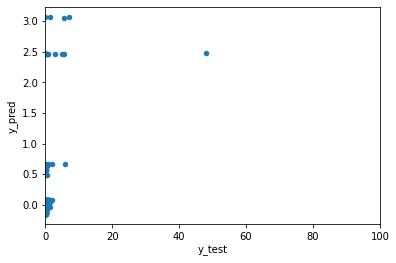

In [401]:
prediction_data.plot(x='y_test',y='y_pred',kind='scatter')
plt.xlim([0,100])

(0.0, 1.0)

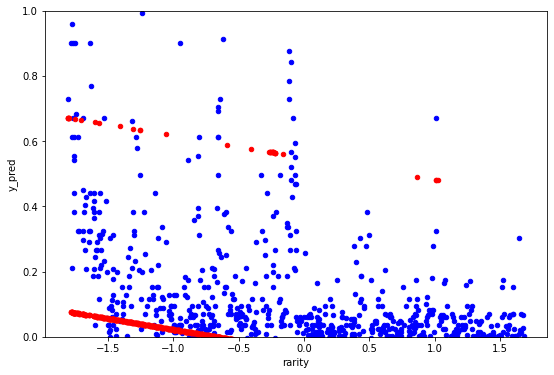

In [405]:
fig,ax = plt.subplots(figsize=(9,6))
prediction_data.plot(x='rarity',y='y_test',kind='scatter',color='blue',ax=ax)
prediction_data.plot(x='rarity',y='y_pred',kind='scatter',color='red',ax=ax)
plt.ylim([0,1])

In [298]:
from sklearn.metrics import r2_score,mean_squared_error

In [299]:
print(r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred))

-0.15807370763491968 634.8923483272932


In [300]:
from sklearn.preprocessing import StandardScaler

In [301]:
sc = StandardScaler()

In [309]:
X_new = sc.fit_transform(X)

In [310]:
X_train,X_test,y_train,y_test = train_test_split(X_new,y,test_size=0.3)
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

print(r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred))

0.17947090512592379 582.5321791585416


In [311]:
X

,total_sold,types,rarity,skin,total_traits
0,3,1,2023,4,3
1,3,1,4352,3,2
2,3,1,155,3,3
3,1,1,7635,2,1
4,2,1,2825,2,2
...,...,...,...,...,...
5610,1,1,6130,4,3
5611,1,1,2488,4,2
5612,3,1,2139,2,2
5613,3,1,7564,2,4


In [312]:
explanatory_data = pd.DataFrame({"y_test": y_test})
prediction_data = explanatory_data.assign(y_pred =y_pred)

(0.0, 100.0)

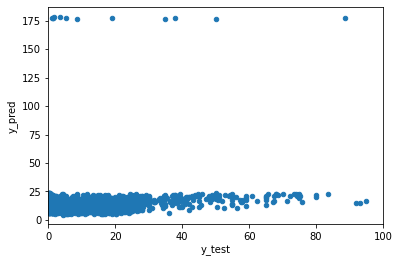

In [313]:
prediction_data.plot(x='y_test',y='y_pred',kind='scatter')
plt.xlim([0,100])

In [316]:
pd.DataFrame({"x_test": X_test.reshape(1,-1)})

ValueError: If using all scalar values, you must pass an index